# Notebook 2

This notebook focuses on the relationshipt between model complexity and generalization ability. Not only classification, but also regression will be part of the notebook.

## Import libraries


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## Generate some data

In [36]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


## Visualize the data

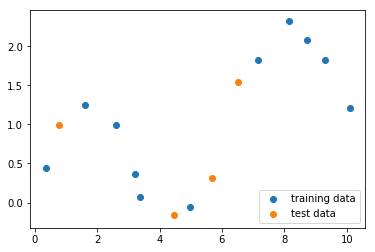

In [3]:
# in the training and test sets.
def plot_data():
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
plot_data()

## Linear Regression with polynomial features

Now a function will be implemented which fits a polynomial Linear Regression model on the training data (X_train). The function will test the model with degrees 1, 3, 6, and 9. For each model, 100 predicted values over the interval x = 0 to 10 will be idenfied.

In [4]:
def lin_reg_pol1():
    
    # Import libraries
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    model = LinearRegression() # Defines model
    
    finalY = np.linspace(0,10,100).reshape(100,1) # Initialises interval where predictions will be running
    NX_train = X_train[:, np.newaxis] # Gets an additional column 
    
    # This is the linear regression for degree 1
    poly1 = PolynomialFeatures(degree=1) # Polynomial feature extension by degree 1 
    poly_X_train_1 = poly1.fit_transform(NX_train)  # Polynomial feature x - values
    poly_y_test_1 = poly1.fit_transform(finalY) # Polynomial feature y - values
    linReg1 = model.fit(poly_X_train_1,y_train) # Fits the model 
    finArray1 = linReg1.predict(poly_y_test_1) #Makes the prediction
    
    # This is the linear regression for degree 3
    poly2 = PolynomialFeatures(degree=3) # Polynomial feature extension by degree 3 
    poly_X_train_2 = poly2.fit_transform(NX_train)  # Polynomial feature x - values
    poly_y_test_2 = poly2.fit_transform(finalY) # Polynomial feature y - values
    linReg2 = model.fit(poly_X_train_2,y_train) # Fits the model 
    finArray2 = linReg2.predict(poly_y_test_2) #Makes the prediction

    # This is the linear regression for degree 6
    poly3 = PolynomialFeatures(degree=6) # Polynomial feature extension by degree 6
    poly_X_train_3 = poly3.fit_transform(NX_train)  # Polynomial feature x - values
    poly_y_test_3 = poly3.fit_transform(finalY) # Polynomial feature y - values
    linReg3 = model.fit(poly_X_train_3,y_train) # Fits the model 
    finArray3 = linReg3.predict(poly_y_test_3) #Makes the prediction
    
    # This is the linear regression for degree 9
    poly4 = PolynomialFeatures(degree=9) # Polynomial feature extension by degree 39
    poly_X_train_4 = poly4.fit_transform(NX_train)  # Polynomial feature x - values
    poly_y_test_4 = poly4.fit_transform(finalY) # Polynomial feature y - values
    linReg4 = model.fit(poly_X_train_4,y_train) # Fits the model 
    finArray4 = linReg4.predict(poly_y_test_4) #Makes the prediction
    
    stackArr = np.vstack((finArray1,finArray2,finArray3, finArray4))
    
    return stackArr

### Plot the predicted data

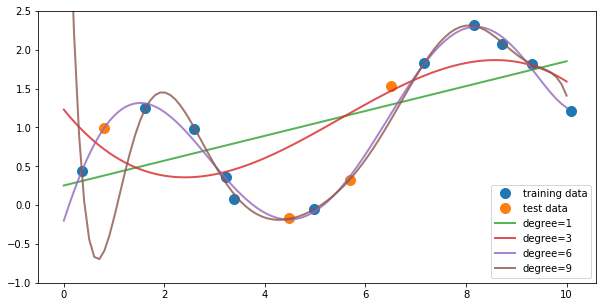

In [5]:
def plot_result1(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label=f"degree={degree}")
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_result1(lin_reg_pol1())

Next, the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data will be determined.

In [6]:
def compute_r2():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    # Your code here
    NX_train = X_train[:, np.newaxis]  # Reshapes the train X  
    NX_test = X_test[:, np.newaxis] # Reshapes the test X  
    model = LinearRegression() # Gets the model 
    
    r2_train, r2_test = [], [] # Empty lists
    
    for i in range(0,10):
        poly = PolynomialFeatures(degree=i) # Polynomial feature extension by degree 
        poly_X_train = poly.fit_transform(NX_train)  # Polynomial feature x - values
        poly_X_test = poly.fit_transform(NX_test) # Polynomial feature y - values
        linReg = model.fit(poly_X_train,y_train) # Fits the model 
        r2_train.append(linReg.score(poly_X_train, y_train)) # Adds to the score list
        r2_test.append(linReg.score(poly_X_test, y_test)) # Adds to the score list
    
    arr_R2_Train = np.asarray(r2_train) # Converts to np array
    arr_R2_Test = np.asarray(r2_test) # Converts to np array
    
    return arr_R2_Train, arr_R2_Test


Plotting the $R^2$ scores from oreviously defined function to visualize the relationship between degree level and $R^2$.

[0.         0.42924578 0.4510998  0.58719954 0.91941945 0.97578641
 0.99018233 0.99352509 0.99637545 0.99803706]


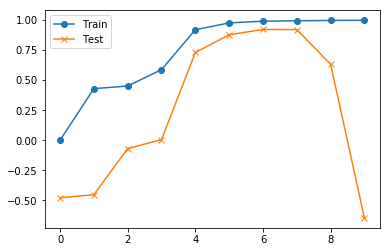

In [37]:
data = compute_r2()

x1_val = data[0]
x2_val = data[1]
print(x1_val)

plt.plot(range(0,10), x1_val, marker= 'o', label="Train")
plt.plot(range(0,10),x2_val, marker= 'x', label="Test")
plt.legend()
plt.show()


## Ups! Potential Overfitting?!

Training models on high degree polynomial features can create overly complex models that tend to overfit. In order to prevent this, regularized versions of the model are used to constrain model complexity. This can be done for example with Ridge and Lasso linear regression.

Here, two models are created: a non-regularized Linear Regression model with default parameters and a regularized Lasso Regression model, with parameters `alpha=0.01` and `max_iter=10000`. Both models are trained on polynomial features of degree 12. In order to evaluate them, the $R^2$ scores for both the linear models are computed.

In [19]:
def correct_overfit():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    
    NX_train = X_train[:, np.newaxis]  # Reshapes the train X  
    NX_test = X_test[:, np.newaxis] # Reshapes the test X  
    model1 = LinearRegression() # Gets the model Linear Regression
    model2 = Lasso(alpha=0.01, max_iter = 10000) # Gets the model Lasso
    
    poly12 = PolynomialFeatures(degree=12) # Polynomial feature extension by degree 12
    poly_X_train = poly12.fit_transform(NX_train)  # Polynomial feature x - values
    poly_X_test = poly12.fit_transform(NX_test) # Polynomial feature y - values
    
    linReg = model1.fit(poly_X_train,y_train) # Fits according to model Least Squares
    lasso = model2.fit(poly_X_train,y_train) # Fits according to model Lasso
    
    linRegScore = linReg.score(poly_X_test, y_test)
    lassoScore = lasso.score(poly_X_test, y_test)

    return print(f"The R2 score of the regular LinReg is {linRegScore} and for Lasso it is {lassoScore}")

correct_overfit()

The R2 score of the regular LinReg is -4.311980555741178 and for Lasso it is 0.8406625614750356


/Users/vincentvonburen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Classification Of Eatable and Poisonous Mushrooms

Now, we look on a real life example for ML. For this task, the dataset we will use is from [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) saved in `other/mushrooms.csv`. With this data we will train a model which is able to predict whether or not a mushroom is eatible (or poisonous). Here are the attributes of the dataset:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

__Important!__

The data is still encoded with strings. In order to use sklearn, we have to encode them to numeric values. In that sense, we will use pandas get_dummies function to convert the categorical variables into numerical variables. 

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('other/mushrooms.csv') # Reads the data from the CSV file
mush_df2 = pd.get_dummies(mush_df) 

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

## Decision Tree Classifier

This time, we will use a DT classifier to work with `X_train2` and `y_train2` from the previou cell. Furthermore, we want to focus on the most signifcant features. So the question is, what are the 5 most important features?

__Note__: We have to set a random state for the DT classifier!

*Reminder*
The feature names in the `X_train2.columns` instance, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 


In [25]:
def top_features():
    from sklearn.tree import DecisionTreeClassifier

    DT_clf = DecisionTreeClassifier().fit(X_train2, y_train2)
    df = pd.DataFrame({'Feature': X_train2.columns.values, 'Importance': DT_clf.feature_importances_})
    
    top5_list = df.sort_values(by=['Importance'], ascending=False)['Feature'].head(5).tolist()
    
    return top5_list 

top_features()

['odor_n',
 'stalk-root_c',
 'stalk-surface-below-ring_y',
 'spore-print-color_r',
 'odor_l']

## Support Vector Classifier

Now, the focus shifts towards the `validation_curve` function in `sklearn.model_selection` and also towards Support Vector Classifiers (`SVC`) with varying parameter values. 

__Info__:
**Because creating a validation curve requires fitting multiple models, this task will use just a subset of the original mushroom dataset. We will apply it on the variables X_subset and y_subset.

The classifier we apply has a radial basis kernel. The default parameter is C=1 and random state = 0. Additionally, we have the `gamma` parameter.  

With this classifier and the dataset in X_subset, y_subset, we can now investigate the impact of different `gamma` values on accuracy by using the `validation_curve` function. We want to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` we fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Lastly, we identify the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays (for training and testing).

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])



In [27]:
def validate_svc():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    
    param_range = np.logspace(-4, 1, 6) # Creates the parameter range for gamma
    svc_clf = SVC(kernel = 'rbf', C=1, random_state=0)
    train_scores, test_scores = validation_curve(svc_clf, X_subset, y_subset, param_name='gamma', param_range=param_range, cv=3, scoring='accuracy')
    
    map_obj1 = map(np.mean, train_scores) # Applies the np.mean function on results
    map_obj2 = map(np.mean, test_scores)
    train_score_arr = np.array(list(map_obj1))
    test_score_arr = np.array(list(map_obj2))
    
    return (train_score_arr, test_score_arr)

In [28]:
validate_svc()

(array([0.56647847, 0.93155951, 0.99039881, 1.        , 1.        ,
        1.        ]),
 array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
        0.52240279]))

### Plotting Results for Different Gammas

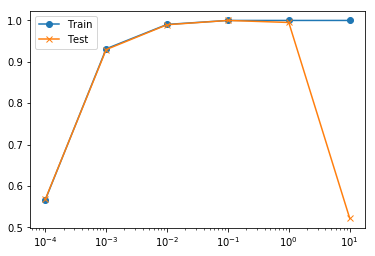

In [38]:
data = validate_svc()

x1_val = data[0]
x2_val = data[1]
param_range = np.logspace(-4, 1, 6)

plt.semilogx(param_range, x1_val, marker= 'o', label="Train")
plt.semilogx(param_range, x2_val, marker= 'x', label="Test")
plt.legend()
plt.show()




__The best gamma parameter with C=1, is Gamma = 0.1__! AWESOME :)